# Functions, derivatives, and plots thereof
This notebook uses sympy for plotting the functions together with their analytically calculated derivatives. It also gives you the results of the calculation on latex format.

https://docs.sympy.org/latest/tutorial/calculus.html

https://www.tutorialspoint.com/sympy/sympy_plotting.htm

https://docs.sympy.org/latest/modules/plotting.html#plotgrid-class

In [5]:
from sympy import *
import matplotlib.pyplot as plt
init_session()
init_printing(use_unicode=True)

import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# remove/comment line below to get plots in a seperate window
%matplotlib inline

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [6]:
# Magic that plots sympy plots on plt.axis so I can arrange them nicely in subplots
def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
#    backend.process_series()
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

# from https://stackoverflow.com/questions/46810880/display-two-sympy-plots-as-two-matplotlib-subplots?rq=1
# with correction: This seems to be broken on Sympy 1.5, at least for me. I had to replace backend.process_series() with the following: backend._process_series(backend.parent._series, ax, backend.parent)
    

In [7]:
def plotFunctionAndNDerivatives(stringFct, nderiv=2, xrange=(-3,3)):
    f     = [None]*(nderiv+1)  # f[n] = nth derivative of stringFct
    p     = [None]*(nderiv+1)  # plot of f[n]
    
    plotrange     = (x, xrange[0], xrange[1])
    fig           = plt.figure(figsize=(6,8))
    subplotLayout = 100*(nderiv+1)+10
    
    nstr="f"
    print("\\begin{align}")
    for n in range(nderiv+1):
        if n==0: 
            f[n] = sympify(stringFct)
        else:
            f[n] = simplify(diff(f[n-1]))
        print(nstr, "\t&= " , latex(f[n]))
        p[n] = plot(f[n], plotrange, xlabel="x", ylabel=nstr, show=False)
        ax = fig.add_subplot(subplotLayout+n+1)
        move_sympyplot_to_axes(p[n], ax)
        nstr += "'"
    print("\\end{align}")
    plt.show()

\begin{align}
f 	&=  x^{2} \sin{\left(x \right)}
f' 	&=  x \left(x \cos{\left(x \right)} + 2 \sin{\left(x \right)}\right)
f'' 	&=  - x^{2} \sin{\left(x \right)} + 4 x \cos{\left(x \right)} + 2 \sin{\left(x \right)}
\end{align}


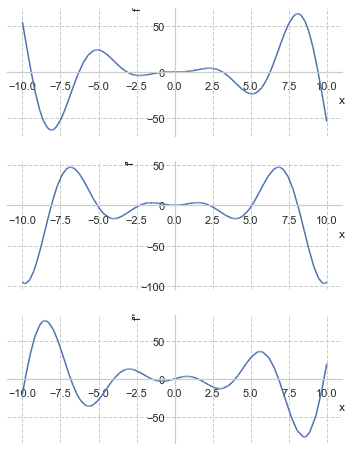

In [8]:
plotFunctionAndNDerivatives("sin(x)*x**2", 2, xrange=(-10,10))